In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris["species"] = data.target
iris["species"] = iris["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [3]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Five point Summary of Data
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

**Check The Null Value Persent In Data**

In [6]:
iris.isnull().sum()

# Here we can see that there no missing value persent in a data

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

**Perform EDA on Dataset**

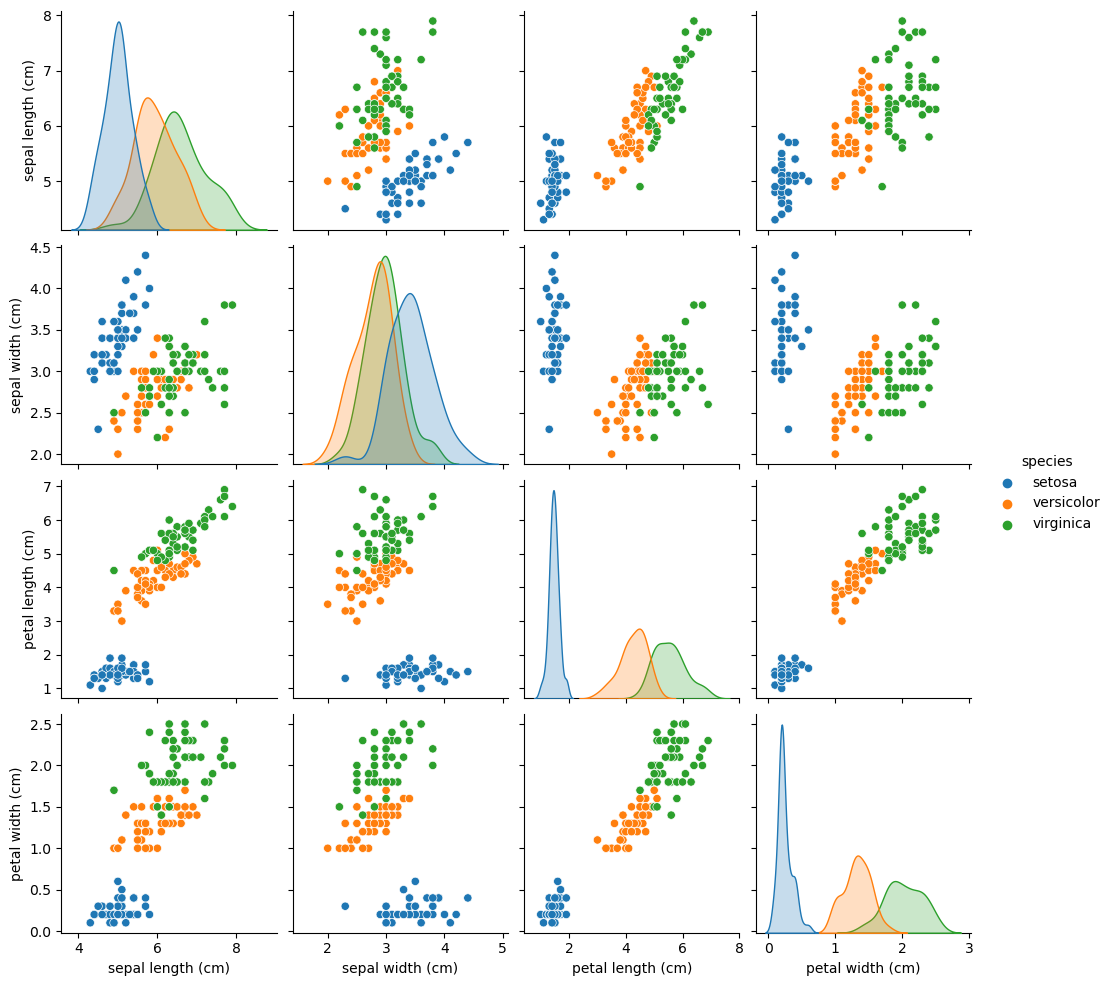

In [7]:
# Pairplot to visualize the distributions and relationships of pairs of features
sns.pairplot(iris, hue="species")
plt.show()

In [8]:
num_vars = iris.select_dtypes(include = np.number).columns
print(num_vars)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


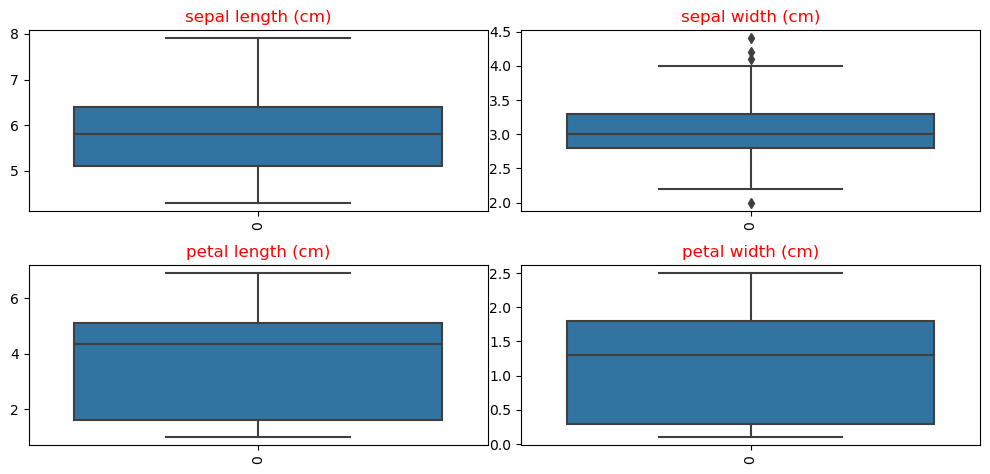

In [9]:
# Box plots for each feature by species to understand distributions
nrows = 3
ncol = 2
repeater = 1

plt.figure(figsize=(10,7))
for i in num_vars:
    plt.subplot(nrows, ncol,repeater)
    sns.boxplot(iris.loc[:,i])
    plt.title(i , color= 'red')
    repeater = repeater+1
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

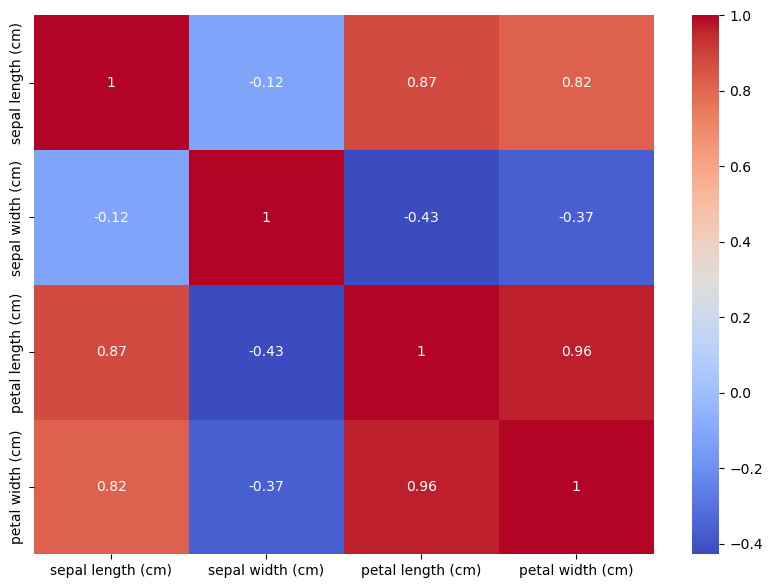

In [10]:
plt.figure(figsize=(10,7))
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

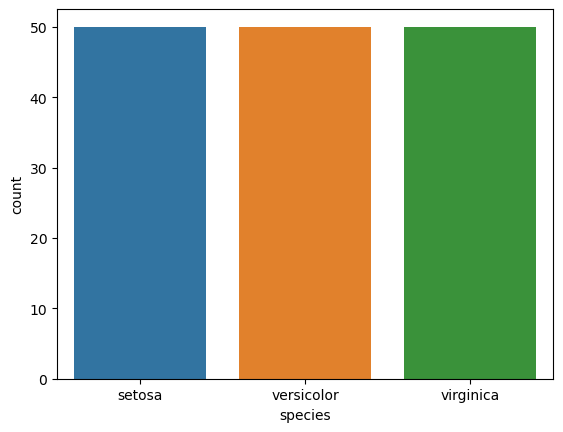

In [11]:
sns.countplot(x="species", data=iris)
plt.show()

# The count of species are same with diffent categories.

**Correlation Metrix and Covarience Metrix**

In [12]:
cov_metrix = iris.cov()
cov_metrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [13]:
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [14]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [15]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Build a Model**

In [16]:
from sklearn.model_selection import train_test_split

X = iris.drop("species", axis=1)
y = iris["species"]

In [17]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score ,classification_report

In [19]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",accuracy)

Accuracy Score:  1.0


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
pd.DataFrame({'Actual': y_test,  'Predicted': y_pred}).head(50)

,Actual,Predicted
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,versicolor
31,setosa,setosa
64,versicolor,versicolor
141,virginica,virginica
68,versicolor,versicolor
82,versicolor,versicolor
